# Ford-GoBike-System Data Exploring
## by Sultanah Aldossari

## Investigation Overview


> The Ford GoBike system is one of several bike sharing programs in the San Francisco Bay Area. As of January 2018, Bay Wheels had about 10,000 subscribers and launched the first regional and large-scale bicycle sharing system in California and the Western United States. It has provided nearly 500,000 rides since its launch in 2017. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from ride trips data in Feb 2019.

## Dataset Overview

> The dataset include information about bike trips on February and March 2019. It include 183412 observations and 16 columns. The dataset include:

- duration_sec: Trip duration in seconds
- start_time: Trip start time and date
- end_time: Trip end time and date
- start_station_id: Trip start station id
- start_station_name: Station name
- start_station_latitude: Start station latitude
- start_station_longitude Start station longitude
- end_station_id: Trip end station ID
- end_station_name: Trip end station name
- end_station_latitude: End Station Latitude
- end_station_longitude: End Station Longitude
- bike_id: Bike ID
- user_type: User type whether a subscriber or a customer -- (“Subscriber” = Member or “Customer” = Casual)
- member_birth_year: User birth year
- member_gender: User gender whether a female or male
- bike_share_for_all_trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2019trips.csv')
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,hourofday,dayofweek,month,duration_minute,member_age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,2019-02-28,17,Thursday,February,869.750000,35
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2019-02-28,12,Thursday,February,1030.900000,47
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,2019-02-28,17,Thursday,February,608.166667,30
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2019-02-28,23,Thursday,February,26.416667,45
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,2019-02-28,23,Thursday,February,29.883333,60


## User Types and Their Daily Usage

The plot effectively illustrates the stark difference between Customers and Subscribers. In general, the bike share system is not very popular with customers; usage increases on weekends. The opposite is true for subscribers - on weekdays, usage has been high, but on weekends, usage has declined sharply.

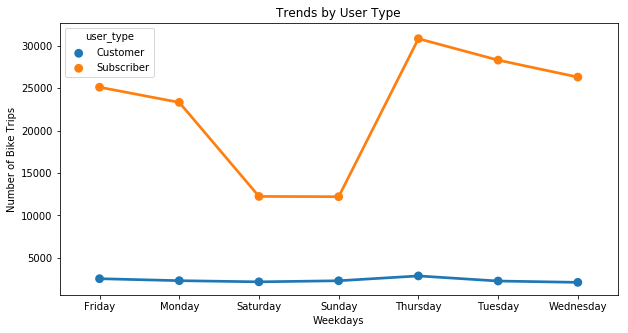

In [3]:
plt.figure(figsize=(10,5))
mask = df.groupby(['dayofweek', 'user_type']).size().reset_index()
ax = sns.pointplot(data=mask, x='dayofweek', y=0, hue = 'user_type')
plt.title('Trends by User Type')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');

## User Type by hours

> The number of subscribers was higher than the number of casual customers. we can see from the plot clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon

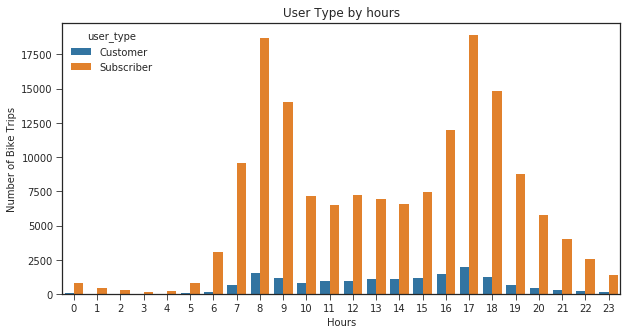

In [4]:
sns.set_style("ticks")
plt.figure(figsize=(10,5))
p = sns.countplot(data = df, x = 'hourofday', hue = 'user_type')
p.legend(loc = 2, framealpha = 0.2, title = 'user_type');
plt.title('User Type by hours')
plt.xlabel('Hours')
plt.ylabel('Number of Bike Trips');

## Average trip duration by weekdays between customers and subscribers

This plot shows that subscribers ride much shorter/quicker trips than customers on every day of the week. In particular, casual riders ride longer on Saturdays and Sundays than on other days of the week. The average duration of subscription usage seems to be more consistent between customers and subscribers.

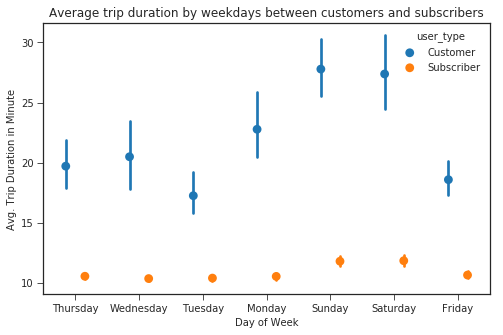

In [5]:
plt.figure(figsize=[8,5])
sns.pointplot(data=df, x='dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.title('Average trip duration by weekdays between customers and subscribers');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

# Summary

> An impressive number of people will be able to benefit from this project:
The product is affordable and convenient transportation for anyone.
It provides for customers (students, tourists, etc.) with a flexible and sustainable way to tour the city.
Subscriptions (individuals who commute on a daily basis) benefit from the service in a convenient manner, according to the analysis
Using the Ford GoBike System is a great sustainable way to move around the city, both for leisure and for work. Users of the system can be either subscribers or customers. A majority of subscribers are daily commuters who have short trips to and from work. They rent bikes during weekdays at 8-9am and 5-6pm, and sometimes during lunch time. The system is mainly used by tourists and occasional riders on weekends to explore the Bay Area.